<a href="https://colab.research.google.com/github/Futty93/YWanalysys2/blob/main/sigmoidFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-10-0deac33c0e17>:7: RuntimeWarning: divide by zero encountered in log
  y = a / (1 + np.exp(-k*(np.log(x)-np.log(x0)))) + c


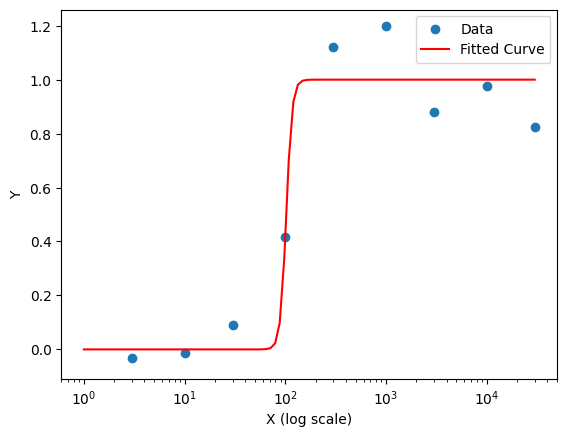

Fitted Parameters:
k: 102.2907596077409
x0: 14.83666312070351
a: 1.0000059159482702
X when Y=0.5: 97.6858520142912


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the sigmoid function
def sigmoid(x, x0, k, a, c):
  y = a / (1 + np.exp(-k*(np.log(x)-np.log(x0)))) + c
  return y

# Given data
x = np.array([0, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000])
y = np.array( [645912.4444444444, 662687.4444444445, 681729.4444444445, 782613.2222222221, 1104603.4444444443, 1799189.7777777778, 1875477.3333333333, 1562872.5555555557, 1655872.6666666667, 1508195.888888889])
# maxNum = max(y)
# for i in range(10):
#   y[i] = y[i]/maxNum

init_params = np.array([100, 1, max(y) - min(y), min(y)])

# Fit the data to the sigmoid curve
popt, pcov = curve_fit(sigmoid, x, y, init_params)

# Generate values for the x-axis to plot the fitted curve
x_fit = np.logspace(0, np.log10(30000), 100)
y_fit = sigmoid(x_fit, *popt)

sigMin = min(y_fit)
sigMax = max(y_fit)

for i in range(10):
  y[i] = (y[i] - sigMin)/(sigMax - sigMin)

init_params = np.array([100, 1, max(y) - min(y), 0])

# Fit the data to the sigmoid curve
popt, pcov = curve_fit(sigmoid, x, y, init_params)

# Generate values for the x-axis to plot the fitted curve
x_fit = np.logspace(0, np.log10(30000), 100)
y_fit = sigmoid(x_fit, *popt)

# Find X when Y is 0.5
y_target = 0.5
x_target = np.power(10, (np.log10(x_fit[np.abs(y_fit - y_target).argmin()])))

# Plotting the original data and the fitted curve
plt.scatter(x, y, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.xscale('log')
plt.xlabel('X (log scale)')
plt.ylabel('Y')
plt.legend()
plt.show()

# Print the parameters of the fitted curve
print('Fitted Parameters:')
print('k:', popt[0])
print('x0:', popt[1])
print('a:', popt[2])
# print(popt)
# print(y_fit)

# Print the value of X when Y=0.5
print('X when Y=0.5:', x_target)


